In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("madfhantr.csv")
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
df.head()
df.columns = df.columns.str.strip()

In [5]:
df["Gender"] = df["Gender"].map({"Male" : 1, "Female" : 0})
df["Married"] = df["Married"].map({"Yes" : 1, "No" : 0})
df["Education"] = df["Education"].map({"Graduate" : 1, "Not Graduate" : 0})
df["Self_Employed"] = df["Self_Employed"].map({"Yes" : 1, "No" : 0})
df["Property_Area"] = df["Property_Area"].map({"Urban" : 1, "Rural" : 0})
df["Loan_Status"] = df["Loan_Status"].map({"Y" : 1, "N" : 0})

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1


In [7]:
X = df.drop(columns=["Loan_ID","Loan_Status","Dependents"] , axis=1)
y = df["Loan_Status"]

In [8]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
dc = DecisionTreeClassifier()

In [10]:
dc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
y_pred = dc.predict(X_test)

In [12]:
print("accuracy :\n", metrics.accuracy_score(y_test, y_pred))
print("Recall \n", metrics.recall_score(y_test, y_pred))
print("f1 :\n", metrics.f1_score(y_test, y_pred))
print("CM :\n", metrics.confusion_matrix(y_test, y_pred))

accuracy :
 0.7291666666666666
Recall 
 0.7714285714285715
f1 :
 0.8059701492537313
CM :
 [[16 10]
 [16 54]]


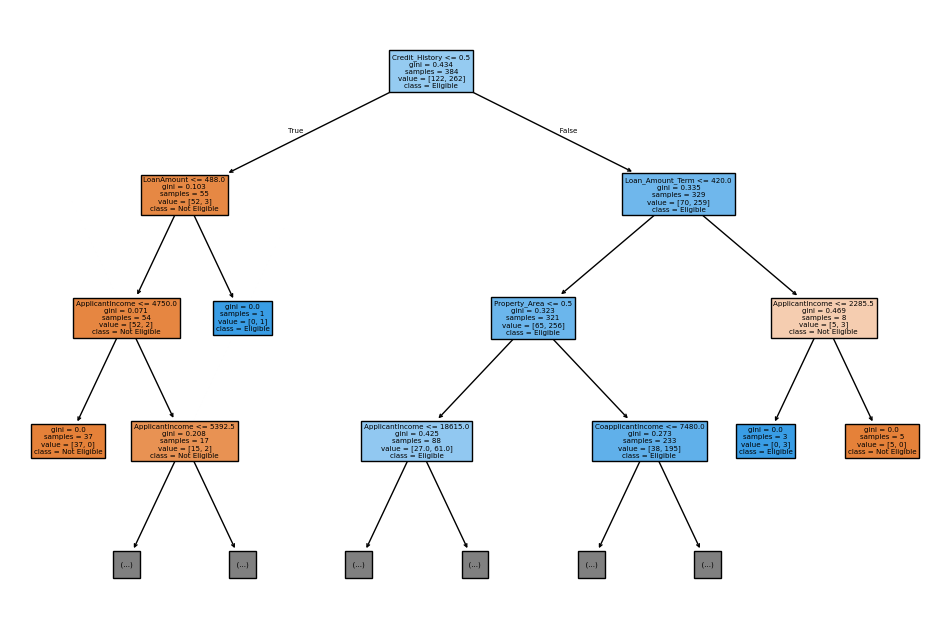

In [20]:
plt.figure(figsize=(12,8))
plot_tree(dc, filled=True, feature_names = X.columns, class_names = ["Not Eligible", "Eligible"], max_depth = 3)
plt.show()

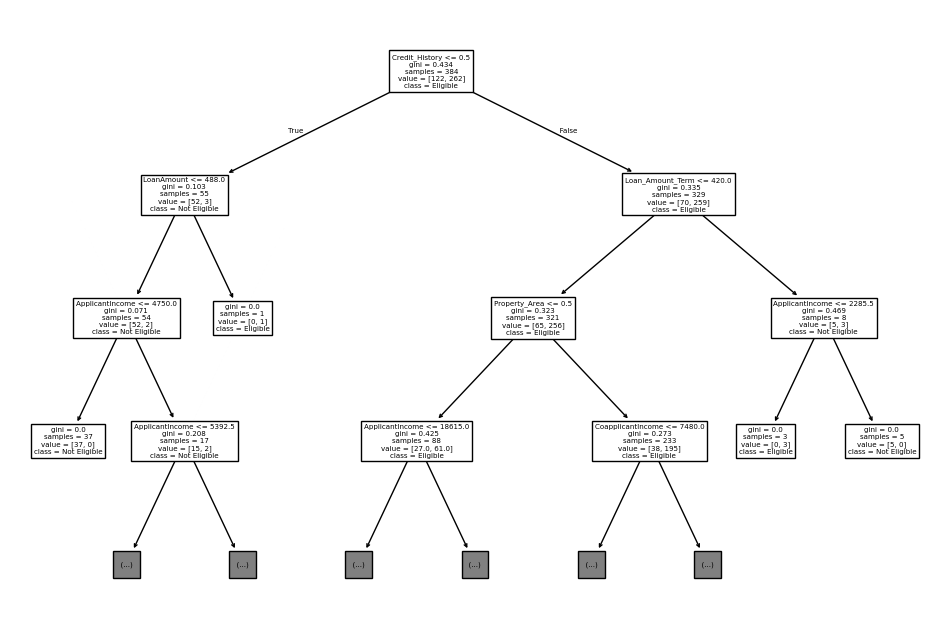

In [19]:
plt.figure(figsize=(12,8))
plot_tree(dc, max_depth = 3, feature_names = X.columns, class_names = ["Not Eligible", "Eligible"])
plt.show()